In [1]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 10.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 7.8 MB/s eta 0:00:00a 0:00:01


In [77]:
import os
import csv
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from contextlib import contextmanager
from utils import npy_save

In [78]:
def get_files(method:str, selection):
    path = f'/workspace/accuracy/{selection}/{method}/'
    file_list = os.listdir(path+'csv_files')
    file_list_csv = [file for file in file_list if file.endswith('.csv')]
    seeds = []
    pattern = f'{method}_sparse_output_([0-9]+).csv'
    for file in file_list_csv:
        result = re.search(pattern, file)
        seeds.append(result.group(1))
    return path, file_list_csv, seeds

In [91]:
def data_sorting(file_str):
    data = pd.read_csv(file_str)
    data_sorted = data.sort_values(by="sparsity").drop_duplicates(subset=['sparsity'], keep = 'first')
    return data_sorted

In [80]:
@contextmanager
def savefig(path_str,filename):
    dir_name = os.path.dirname(path_str)
    if not os.path.isdir(dir_name):
        os.makedirs(dir_name)
    yield plt.savefig(path_str+filename)

In [81]:
def save_means(method:str, selection:str = '[1, 0]'):
    path, file_list, seeds = get_files(method, selection)
    sorted_datas = []
    total_results = []
    for i in range(len(file_list)):
        sorted_datas.append(data_sorting(path+'csv_files/'+file_list[i]))
    results = pd.concat(sorted_datas)
    sparsitys = results['sparsity'].drop_duplicates()

    for i in sparsitys:
        total_results.append(np.array(results['accuracy'][results['sparsity'] == i]).mean())

    with npy_save(path + 'mean_result.npy', np.array(total_results)) as npy:
        npy
    with npy_save(path + 'sparsity.npy', np.array(sparsitys)) as npy:
        npy
    return path, file_list, seeds

In [82]:
def draw_diff_select(method:str, selections:list):
    means = []
    for selection in selections:
        mean = np.load(f'/workspace/accuracy/{selection}/{method}/mean_result.npy', allow_pickle=True)
        sparsity = np.load(f'/workspace/accuracy/{selection}/{method}/sparsity.npy', allow_pickle=True)
        plt.plot(sparsity, mean, label=str(selection))
    plt.title(f"{method} Insparsity-Accurancy Graph")
    plt.xlabel("Insparsity")
    plt.ylabel("accuracy")
    plt.legend()
    plt.savefig(f'/workspace/accuracy/diff_select_graph_{method}.png')
    plt.clf()

In [83]:
def save_graphs(method:str, selection):
    path, file_list, seeds = get_files(method, selection=selection)
    for i in range(len(file_list)):
        data = data_sorting(path+'csv_files/'+file_list[i])
        sparsity = np.array(data["sparsity"])
        accuracy = np.array(data["accuracy"])
        plt.plot(sparsity,accuracy)
        plt.xlabel("insparsity")
        plt.ylabel("accuracy")
        plt.title(f"{method}_{seeds[i]}")
        with savefig(path+'eachfig/', f"{method}_{seeds[i]}.png") as save:
            save
        plt.clf()

In [84]:
def box_graphs(method:str, selection):
    path, file_list, seeds = get_files(method, selection)
    sorted_datas = []
    total_results = []
    for i in range(len(file_list)):
        sorted_datas.append(data_sorting(path+'csv_files/'+file_list[i]))
    results = pd.concat(sorted_datas)
    sparsitys = list(results['sparsity'].drop_duplicates())

    for i in list(sparsitys):
        total_results.append(list(results['accuracy'][results['sparsity'] == i]))

    plt.boxplot(total_results)
    plt.xticks(range(1,len(sparsitys)+1), sparsitys)
    plt.title(f'boxplot of {method}_{selection}_sampling{len(file_list)}')
    plt.xlabel("insparsity")
    plt.ylabel('accuracy')
    with savefig(path+'meanfig/', f"{method}_{selection}.png") as save:
        save
    plt.clf()

In [85]:
def mean_graphs(method:str, selection):
    path, file_list, seeds = save_means(method, selection)
    total_results = np.load(f'/workspace/accuracy/{selection}/{method}/mean_result.npy', allow_pickle=True)
    sparsity = np.load(f'/workspace/accuracy/{selection}/{method}/sparsity.npy', allow_pickle=True)
    
    plt.plot(sparsity, np.array(total_results))
    plt.title(f'meanplot of {method}_{selection}_sampling{len(file_list)}')
    plt.xlabel("insparsity")
    plt.ylabel('accuracy')
    with savefig(path+'meanfig/', f"{method}_{selection}_mean.png") as save:
        save
    plt.clf()

In [86]:
def log_graphs(method:str, selection):
    path, file_list, seeds = save_means(method, selection)
    total_results = np.load(f'/workspace/accuracy/{selection}/{method}/mean_result.npy', allow_pickle=True)
    sparsity = np.load(f'/workspace/accuracy/{selection}/{method}/sparsity.npy', allow_pickle=True)
    
    plt.plot(sparsity, np.array(total_results))
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f'logx, logy plot of {method}_{selection}_sampling{len(file_list)}')
    plt.xlabel("insparsity")
    plt.ylabel('accuracy')
    with savefig(path+'meanfig/', f"{method}_{selection}_log.png") as save:
        save
    plt.clf()

In [87]:
def logx_graphs(method:str, selection):
    path, file_list, seeds = save_means(method, selection)
    total_results = np.load(f'/workspace/accuracy/{selection}/{method}/mean_result.npy', allow_pickle=True)
    sparsity = np.load(f'/workspace/accuracy/{selection}/{method}/sparsity.npy', allow_pickle=True)
    
    plt.plot(sparsity, np.array(total_results))
    plt.xscale('log')
    plt.title(f'logx plot of {method}_{selection}_sampling{len(file_list)}')
    plt.xlabel("insparsity")
    plt.ylabel('accuracy')
    with savefig(path+'meanfig/', f"{method}_{selection}_logx.png") as save:
        save
    plt.clf()

In [88]:
def logy_graphs(method:str, selection):
    path, file_list, seeds = save_means(method, selection)
    total_results = np.load(f'/workspace/accuracy/{selection}/{method}/mean_result.npy', allow_pickle=True)
    sparsity = np.load(f'/workspace/accuracy/{selection}/{method}/sparsity.npy', allow_pickle=True)
    
    plt.plot(sparsity, np.array(total_results))
    plt.yscale('log')
    plt.title(f'logy plot of {method}_{selection}_sampling{len(file_list)}')
    plt.xlabel("insparsity")
    plt.ylabel('accuracy')
    with savefig(path+'meanfig/', f"{method}_{selection}_logy.png") as save:
        save
    plt.clf()

In [106]:
method_list=['anti_diagonal', 'block','diagonal','origin','random','single_diagonal', 'threshold', 'inv_diagonal']
selection_list = ['[1, 0]', '[1, 7]', '[5, 9]', '[3, 6]']

def draw_all_graphs(graph_fun, selections=selection_list, method_list=method_list):
    for selection in selections: 
        for method_str in method_list:
            try:
                graph_fun(method_str, selection)
            except:
                pass
    return None

In [107]:
draw_all_graphs(save_graphs)

In [108]:
draw_all_graphs(mean_graphs)

In [109]:
draw_all_graphs(log_graphs)

In [110]:
draw_all_graphs(logx_graphs)

In [111]:
draw_all_graphs(logy_graphs)

In [112]:
for selection in selection_list:
    for method in method_list:
        save_means(method, selection)
         

In [113]:
for method in method_list:
    draw_diff_select(method=method, selections=selection_list)

In [128]:
"""
from utils import csv_append

selection_list = ['[1, 0]', '[1, 7]', '[5, 9]', '[3, 6]']
for selection in selection_list:
    path, file_list, seeds = get_files(method='threshold', selection=selection)
    for i in range(len(file_list)):
        data = data_sorting(path+'csv_files/'+file_list[i])
        sparsity = np.array(data["sparsity"])
        sparsity = np.ones(sparsity.shape)*(256**2)-sparsity
        accuracy = np.array(data["accuracy"])
        with csv_append(f'/workspace/accuracy/{selection}/threshold/csv_files_changed/threshold_sparse_output_{seeds[i]}.csv') as wr:
            for j in range(len(sparsity)):
                wr.writerow([sparsity[j], accuracy[j]])
"""
        

'\nfrom utils import csv_append\n\nselection_list = [\'[1, 0]\', \'[1, 7]\', \'[5, 9]\', \'[3, 6]\']\nfor selection in selection_list:\n    path, file_list, seeds = get_files(method=\'threshold\', selection=selection)\n    for i in range(len(file_list)):\n        data = data_sorting(path+\'csv_files/\'+file_list[i])\n        sparsity = np.array(data["sparsity"])\n        sparsity = np.ones(sparsity.shape)*(256**2)-sparsity\n        accuracy = np.array(data["accuracy"])\n        with csv_append(f\'/workspace/accuracy/{selection}/threshold/csv_files_changed/threshold_sparse_output_{seeds[i]}.csv\') as wr:\n            for j in range(len(sparsity)):\n                wr.writerow([sparsity[j], accuracy[j]])\n'

In [36]:
save_graphs('double_diagonal', selection='[1, 0]')

In [ ]:
mean_graphs('double_diagonal', selection='[1, 0]')

In [60]:
def draw_kernel(selection, method, seed, sparsity):
    kernel = np.load(f"/workspace/kernel/{selection}/{method}/{seed}/kernel_train_{sparsity}.npy")
    plt.imshow(kernel)
    plt.colorbar()
    plt.savefig(f"/workspace/kernel/{selection}/{method}/{seed}/kernel_train_{sparsity}.png")

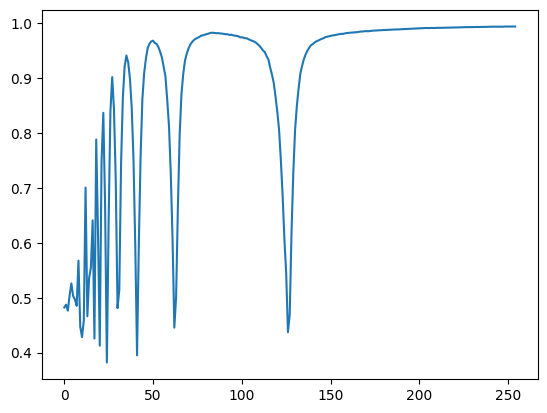

In [50]:
result = np.load("/workspace/accuracy/[5, 9]/diagonal/mean_result.npy")
plt.plot(result)
plt.show()

In [65]:
from scipy.signal import argrelextrema
def minima_sorting(result):
    minima_indices = argrelextrema(result, np.less)[0]
    minima_result = result[minima_indices]
    sorted_indices = np.argsort(minima_result)
    sorted_minima_indices = minima_indices[sorted_indices]
    return sorted_minima_indices
def maxima_sorting(result):
    maxima_indices = argrelextrema(result, np.greater)[0]
    maxima_result = result[maxima_indices]
    sorted_indices = np.argsort(maxima_result)[::-1]
    sorted_maxima_indices = maxima_indices[sorted_indices]
    return sorted_maxima_indices

In [53]:
def get_result(selection, method):
    result = np.load(f"/workspace/accuracy/{selection}/{method}/mean_result.npy")
    return result

In [66]:
method_list=['single_diagonal']
selection_list = ['[1, 0]', '[5, 9]', '[3, 6]']
for selection in selection_list:
    for method in method_list:
        print(maxima_sorting(get_result(selection, method)))

[109 106 120 113 116 124 122 131 128 147 158 145 134 151 136 149 141 155
 160 167 169 163 177 182 171 173 179 186 175 189 191 202 193 195 197 199
 104 206 204 211 209 215 217 223 227  54 229 234  56 239 242  58  32 247
 101  24  15  11  19   6   2   4  28  41  78  82  84]
[128 131 143 141 135 126 152 148 138 145 159 120 155 163 166 175 168 171
 173 116 181 187 197 190 193 206 209 214 212 216 106 221 104 226 229 232
 236  51  54 253 249  32  24  19  15  13   8   5  10   2]
[127 135 137 133 144 125 131 141 151 121 146 161 163 153 178 173 156 167
 171 169 181 189 183 196 200 114 210 208 212 217 220 214 110 250 224 232
 226 244 107 234 240 237  51  53  57  32  24  19  15   4  13   8  10]
